<a href="https://colab.research.google.com/github/csaatechnicalarts/ML_Bootcamp/blob/main/Intro_OSMnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

OSMnx is Python package used in the modeling of ubran geographic features and interconnection networks. Drawing on volunteer-supplied data at [OpenstreetMap](https://wiki.openstreetmap.org/), OSMnx facilitates the geoanalytics of important facets of urban life such as travel networks and accesibility or public health. It is an important tool for urban planning and the global data it handles is publicly accessible through the OpenstreetMap [portal](https://www.openstreetmap.org/).

In this notebook we'll go over the basic features of OSMnx.

## Relevant Python Packages

For starters we'll need to load the OSMnx package together with Matplotlib for visualization. OSMnx is built on top of Geopandas, which in turn extends the Pandas library with geocoding features.

In [1]:
!pip install osmnx
!pip install matplotlib

import osmnx as ox
import matplotlib
import matplotlib.pyplot as plt

print(ox.__version__)
print(matplotlib.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 2.4 MB/s eta 0:00:00
2.0.4
3.10.0


## OpenstreetMap Data Structures and Constructs

OSM abstracts geographic features as geometric primitives: **points**, **lines** and **polygons**. Openstreetmap uses these primitives to encode urban constructs. For example, points locate urban entities such as cafes, museums, hospitals and conceptually represent *points of interest* (POI). As building blocks, an ordered set of points constitute lines that represent road connections. In turn these lines are the building blocks of polygons which stand for physical entities (buildings or parks) or virtual regions (towns, districts, etc.)



## Acquiring Points of Interest (POI) Data

The *geodataframe* is the basic data structure of OSMnx. Organized as a tabular set of rows and columns, the GDF encodes urban data such as geometry, address, amenity categories, contact information (telephone, email or website) -- information we deal with when we talk about places we live or work in, a destinations we travel to or a region we'd like to analyze. Essentially, working with OSMnx involves fetching geodataframes from Openstreetmap and manipulating the information in order to transform it in ways that are relevant to us, perhaps as a table, a map or as a data plot.

Let's get the information for Minato Ward, a city in Metopolitan Tokyo. The code below uses *features_from_place()* to query OSM. We supply the place we're interested in -- formally known as the OSM *administrative boundary* -- along with a dictionary of *tags* to filter the information we want.

OSM tags are organized in a sets of keys and tags. A handy reference for the top-level keys are found [here](https://wiki.openstreetmap.org/wiki/Category:Top-level_keys).

In [2]:
minato_poi = ox.features_from_place('Minato Ward', tags={'amenity': ['cafe', 'pub'], 'tourism':['museum', 'hotel', 'attraction'], 'building':['office', 'retail']})
print(f"{len(minato_poi)} elements in {type(minato_poi)}\n\n")
print(minato_poi.columns)
minato_poi.head(3)

181 elements in <class 'geopandas.geodataframe.GeoDataFrame'>


Index(['geometry', 'fee', 'name', 'name:en', 'name:ja', 'note', 'note:ja',
       'opening_hours', 'source', 'source_ref', 'tourism', 'wikidata',
       'wikimedia_commons', 'wikipedia', 'attraction', 'addr:full', 'amenity',
       'branch', 'brand', 'brand:en', 'brand:ja', 'brand:wikidata', 'cuisine',
       'phone', 'smoking', 'takeaway', 'website', 'brand:wikipedia',
       'name:ja_rm', 'level', 'official_name', 'official_name:en',
       'official_name:ja', 'outdoor_seating', 'building', 'operator', 'shop',
       'wheelchair', 'name:es', 'name:zh', 'building:levels', 'ele', 'height',
       'gambling', 'leisure', 'office', 'second_hand', 'drive_through'],
      dtype='object')


geometry  fee              name  \
element id                                                              
node    1423951030  POINT (136.88053 35.09066)  yes  名古屋海洋博物館・南極観測船ふじ   
        1877383205  POINT (136.81096 35.11789)  NaN             きりふき山   
        1916769194  POINT (136.86978 35.11339)  NaN             星乃珈琲店   

                                  name:en           name:ja  \
element id                                                    
node    1423951030  Fuji Antarctic Museum  名古屋海洋博物館・南極観測船ふじ   
        1877383205                    NaN               NaN   
        1916769194         Hoshino Coffee             星乃珈琲店   

                                                                 note  \
element id                                                              
node    1423951030  National-Land Numerical Information (Public Fa...   
        1877383205                                                NaN   
        1916769194                                                NaN   

                                       note:ja      opening_hours source  \
element id                                                                 
node    1423951030  国土数値情報（公共施設データ）平成19年　国土交通省  Tu-Su 09:30-17:00   KSJ2   
        1877383205                         NaN                NaN    NaN   
        1916769194                         NaN  Mo-Su 07:00-21:30    NaN   

                                                           source_ref  ...  \
element id                                                             ...   
node    1423951030  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...  ...   
        1877383205                                                NaN  ...   
        1916769194                                                NaN  ...   

                   name:es name:zh building:levels  ele height gambling  \
element id                                                                
node    1423951030     NaN     NaN             NaN  NaN    NaN      NaN   
        1877383205     NaN     NaN             NaN  NaN    NaN      NaN   
        1916769194     NaN     NaN             NaN  NaN    NaN      NaN   

                   leisure office second_hand drive_through  
element id                                                   
node    1423951030     NaN    NaN         NaN           NaN  
        1877383205     NaN    NaN         NaN           NaN  
        1916769194     NaN    NaN         NaN           NaN  

[3 rows x 48 columns]

Can we query OSM for information to plot an administive region? Yes, we can. In the example below we turn to the *geocode_to_gdf()* to retrieve polygonal information suitable for plotting.



<class 'geopandas.geodataframe.GeoDataFrame'>


<Axes: >

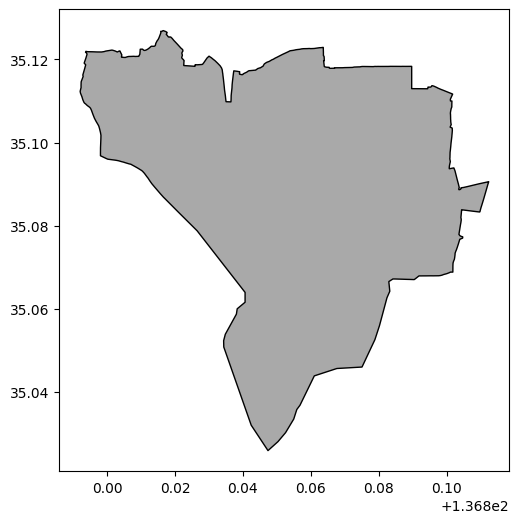

In [3]:
admin_minato = ox.geocode_to_gdf('Minato Ward')
print(type(admin_minato))
admin_minato.plot(color='darkgrey', edgecolor='k', figsize=(6,6))

Using Matplotlib, we can combine information about Minato points of interest (POI) together with its polygonal representation into one infographic. In the example below, we make more than one *plot()* call and overlay the results. Note that we plot POIs by selecting a column-key of the GeoDataFrame, in this case *amenity*.

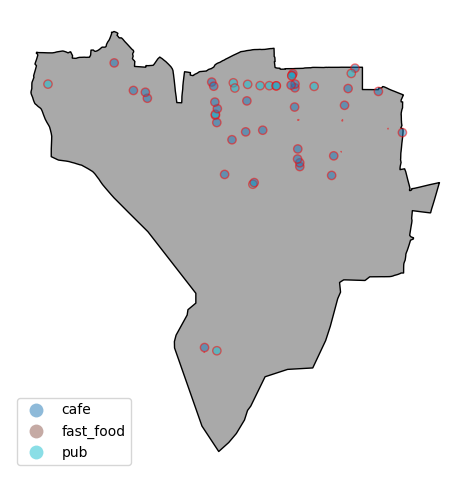

In [4]:
# Create a plot to visualize the admin boundary and park polygons
f, ax = plt.subplots(1, 1, figsize=(6,6))

# Plot the administrative boundary
admin_minato.plot(ax=ax, color='darkgrey', edgecolor='k')

# Plot the amenity POI
minato_poi.plot(column='amenity', ax=ax, alpha=0.5, edgecolor='red', legend=True)

# Customize the plot
ax.axis('off')
plt.show()

## Acquiring Polygonal Data

While plotting points of intererest is useful, the information doesn't convey the geographic scope of particular urban features. We'd also benefit from visualing the entities as polygons.

Let's begin by re-querying OSM for data about Minato. Then let's focus on a subset of GeoDataFrame, the polygons for this administrative region. Finally, with the set of polygons in hand, let's filter the information according to the same tags we've used before.

In [5]:
minato_district = ox.geocode_to_gdf('Minato Ward')
print(type(minato_district))

minato_polygon = minato_district.geometry.values[0]
print(type(minato_polygon))

minato_parks = ox.features_from_polygon(minato_polygon, tags={'leisure': 'park'})
print(type(minato_parks))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'geopandas.geodataframe.GeoDataFrame'>


What is the shapely data type? According to the [Shapely documentation](https://shapely.readthedocs.io):

> Shapely is a BSD-licensed Python package for manipulation and analysis of planar geometric objects.


Inspecting the **minato_featrures** GDF, we see the same number of columns and rows as the POIs we looked at above.

In [6]:
print(f"{len(minato_parks)} elements in {type(minato_parks)}\n\n")
minato_parks.columns

130 elements in <class 'geopandas.geodataframe.GeoDataFrame'>




Index(['geometry', 'leisure', 'name', 'name:en', 'name:ja', 'name:ja_rm',
       'source', 'wikidata', 'wikimedia_commons', 'wikipedia', 'official_name',
       'alt_name', 'wheelchair', 'playground', 'type'],
      dtype='object')

OK, as we've done earlier for the POIs, let's overlay plots for the two polygonal data sets we've gathered.

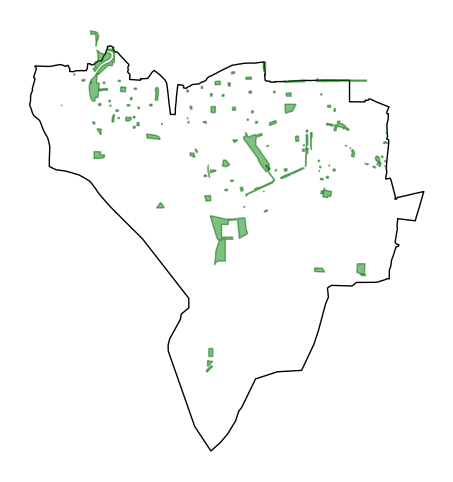

In [10]:
# Create a plot to visualize the admin boundary and park polygons
f, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot the Minato administrative boundary
minato_district.plot(ax=ax, color='none', edgecolor='k')

# Plot the parks in Minato Ward
minato_parks.plot(ax=ax, color='green', alpha=0.5, edgecolor='darkgreen')

# Customize the plot
ax.axis('off')
plt.show()

Now that we've looked at the park amenities at Minato Ward, let's inspect all the building features regardless of subtype and pass it onto Matplotlib.

In [8]:
minato_buildings = ox.features_from_polygon(minato_polygon, tags={'building': True})
print(f"{len(minato_buildings)} elements in {type(minato_buildings)}\n\n")
minato_buildings.columns

56989 elements in <class 'geopandas.geodataframe.GeoDataFrame'>




Index(['geometry', 'building', 'source', 'layer', 'name', 'operator', 'shop',
       'source_ref', 'wheelchair', 'wikidata', 'wikimedia_commons',
       'addr:block_number', 'addr:city', 'addr:neighbourhood', 'addr:province',
       'addr:quarter', 'addr:suburb', 'building:levels', 'height', 'tourism',
       'man_made', 'tower:type', 'name:en', 'amenity', 'ele', 'fee', 'name:es',
       'name:ja', 'name:zh', 'opening_hours', 'phone', 'website', 'wikipedia',
       'wikipedia:ja', 'addr:postcode', 'atm', 'fax', 'note', 'note:ja', 'ref',
       'branch', 'gambling', 'leisure', 'addr:country', 'access', 'parking',
       'brand', 'brand:en', 'brand:ja', 'brand:wikidata', 'brand:wikipedia',
       'name:ja-Latn', 'name:ja_kana', 'name:ja_rm', 'surface', 'name:ko',
       'official_name:en', 'addr:housenumber', 'government', 'name:vi',
       'office', 'cuisine', 'takeaway', 'craft', 'outdoor_seating', 'capacity',
       'payment:cash', 'dispensing', 'healthcare', 'landuse', 'second_hand',

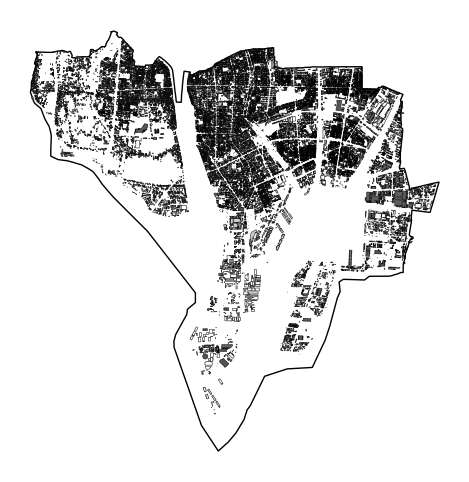

In [11]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot the Minato administrative boundary
minato_district.plot(ax=ax, color='none', edgecolor='k')

# Plot the parks in Minato Ward
minato_buildings.plot(ax=ax, cmap = 'Greys', edgecolor = 'black', alpha = 0.7, linewidth = 0.5)

# Customize the plot
ax.axis('off')
plt.show()